### t2.micro, AWS Marketplace -> Anaconda with Python 3

### 1) Missing Value Ratio

In [1]:
import numpy as np

psuedo_column = np.random.randint(low=0, high=10, size=2000)

print('Percentage of data missing from column: {:.0%}'.format(np.sum((psuedo_column < 1).astype(np.float))/len(psuedo_column)))

Percentage of data missing from column: 11%


### 2) Low Variance Filter

In [1]:
import numpy as np

psuedo_column = np.random.randint(low=0, high=10, size=2000)

print('Variance of column: {:.0f}'.format(np.var(psuedo_column)))

Variance of column: 8


### 3) High Correlation Filter

In [1]:
from scipy.stats import pearsonr
import numpy as np

psuedo_column_1 = np.random.normal(size=100)
psuedo_column_2 = np.random.normal(size=100)

print('Correlation of columns: {:.5f}'.format(pearsonr(psuedo_column_1, psuedo_column_2)[0]))

Correlation of columns: -0.12252


### 4) Random Forest

Text(0.5, 0, 'Relative Importance')

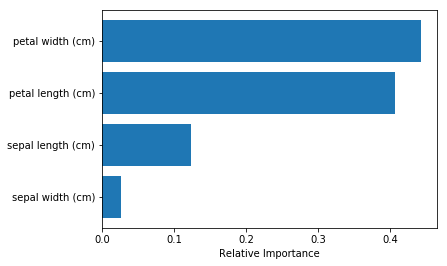

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris        = load_iris()
importances = RandomForestClassifier(n_estimators=100).fit(iris.data, iris.target).feature_importances_
indices     = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [iris.feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

### 5) Backward Feature Elimination

In [1]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

x, y = make_friedman1()

print('Rank of 1 indicates a column a high importance:')
print(RFE(SVR(kernel="linear")).fit(x, y).ranking_)

Rank of 1 indicates a column a high importance:
[1 1 5 1 1 1 3 4 6 2]


### 6) Factor Analysis (FA)

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis

iris   = load_iris()
factor = FactorAnalysis(n_components=4).fit(iris.data)

print('Values near zero indicate lower value factors:')
print(pd.DataFrame(factor.components_, columns=iris.feature_names))

Values near zero indicate lower value factors:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.706989         -0.158005           1.654236           0.70085
1           0.115161          0.159635          -0.044321          -0.01403
2          -0.000000          0.000000           0.000000           0.00000
3          -0.000000          0.000000           0.000000          -0.00000


### 7) Principle Component Analysis (PCA)

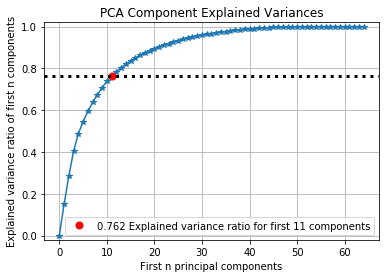

In [5]:
import scikitplot as skplt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits as load_data

X, y = load_data(return_X_y=True)
skplt.decomposition.plot_pca_component_variance(PCA().fit(X))

### 8) Independent Component Analysis (ICA)

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import FastICA

iris   = load_iris()
ica    = FastICA(n_components=4).fit(iris.data)

print('Values near zero indicate lower value factors:')
print(pd.DataFrame(ica.components_, columns=iris.feature_names))

Values near zero indicate lower value factors:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.034142          0.029628           0.191826         -0.415862
1          -0.053971          0.241784           0.083301         -0.080042
2           0.254523         -0.121960          -0.145863          0.079602
3           0.019116          0.002492          -0.048108         -0.013382


### 9) t-Distributed Stochastic Neighbor Embedding (tSNE)

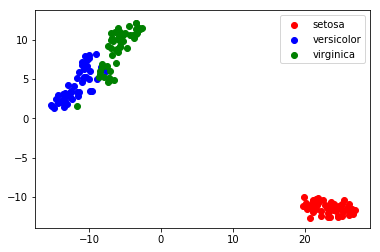

In [2]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

iris = load_iris()
tsne = TSNE().fit_transform(iris.data)

for color, target_number, target_name in zip(
                                             ['red', 'blue', 'green'], 
                                             [0, 1, 2]               , 
                                             iris.target_names
                                            ):

    plt.scatter(
                tsne[iris.target == target_number, 0], 
                tsne[iris.target == target_number, 1], 
                color = color, 
                label = target_name
               )
plt.legend()

### 10) Linear Discriminant Analysis (LDA)

In [1]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

x   = np.random.uniform(size=(2000, 5))
y   = np.random.randint(low=0, high=10, size=2000)
lda = LinearDiscriminantAnalysis(n_components=3).fit(x, y)

print('Variance preserved from the full dataset: {:.0%}'.format(np.sum(lda.explained_variance_ratio_)))

Variance preserved from the full dataset: 81%
